In [1]:
# 프로젝트 라이브러리
from thenews.__lib__ import *

# 오픈 패키지
from pymongo import MongoClient
client = MongoClient()
db = client[DB명]

# 나의 패키지
import __pymongo as mg
import __matplotlib as mpl
%matplotlib inline

# 프로젝트 라이브러리

# 모듈 라이브러리
import News as news
import Layout as lay

# 전역변수


# # # # # /Users/sambong/p/lib/LIB_PJT.py # # # # #

# # # # # /Users/sambong/p/lib/__debug.py # # # # #

# # # # # /Users/sambong/p/lib/__pymongo.py # # # # #

# # # # # /Users/sambong/p/lib/PyMongo/Loader.py # # # # #

# # # # # /Users/sambong/p/lib/PyMongo/Inserter.py # # # # #

# # # # # /Users/sambong/p/lib/PyMongo/SaveDeduplicator.py # # # # #

# # # # # /Users/sambong/p/lib/__list.py # # # # #

# # # # # /Users/sambong/p/lib/PyMongo/Backup.py # # # # #

# # # # # /Users/sambong/p/lib/PyMongo/Updater.py # # # # #

# # # # # /Users/sambong/p/lib/PyMongo/Report.py # # # # #

# # # # # /Users/sambong/p/lib/PyMongo/DB_Handler.py # # # # #

# # # # # /Users/sambong/p/news/NEWS_PJT.py # # # # #

# # # # # /Users/sambong/p/lib/__matplotlib.py # # # # #

# # # # # /Users/sambong/p/lib/matplotlib/matplotlib_lib_LIBPJT.py # # # # #

# # # # # /Users/sambong/p/lib/matplotlib/Line.py # # # # #

# # # # # /Users/sambong/p/lib/matplotlib/matplotlib_lib.py # # # # #

# # # # # /Users/sambong/p

In [2]:
#db['네이버의_쟁점_명명_정보'].rename('네이버의_쟁점명')
#db['언론인'].drop()
sorted(db.collection_names())

['tw_home_timeline',
 '네이버_오픈API_뉴스검색결과',
 '네이버기준_쟁점명',
 '네이버의_쟁점명',
 '뉴스',
 '뉴스TBL과_RD_TBL간의_뉴스id를_비교대조',
 '뉴스XX_명사li__검토후삭제',
 '뉴스_ETRI언어분석',
 '뉴스_ETRI언어분석_원본',
 '뉴스_원본',
 '뉴스_클러스터',
 '언론사',
 '언론인',
 '유투브영상',
 '유투브영상_세계뉴스',
 '인물정보',
 '자료명_소스코드_맵',
 '트위터_팔로잉_이름',
 '함수실행로그',
 '화면배치',
 '화면배치_URL',
 '화면배치_원본']

In [3]:
db['뉴스제목본문_명사li'].find()

# 특정사건(label)에 대한 언론사별 뉴스개수 시간추이

1. clst결과로_타겟자료를_결합해서_df로딩
2. 필요한 컬럼만 추출 -> label, 수집일시, 뉴스제목, 뉴스본문, 언론사, 언론인
2번은 1번 과정에서 미리 적용하면 로딩자료가 작아져서 속도가 빨라진다.
3. 원하는 사건/label을 결정

In [34]:
title명 = '특정사건(label)에 대한 언론사별 뉴스개수 시간추이'

### 클러스터

In [5]:
df0 = news.ClstReport.clst결과로_타겟자료를_결합해서_df로딩(타겟tbl명='뉴스', 타겟col명='뉴스제목', clst타겟col명='뉴스제목', dbg_on=False)


============================================================clst결과로_타겟자료를_결합해서_df로딩

============================================================find
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = df

_id                  object
algorithm            object
clst타겟col명           object
n_clusters            int64
키col명                object
키col명_label_dicli    object
타겟tbl명               object
dtype: object
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = df1

_id      object
label     int64
dtype: object

============================================================find
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = df2

_id                           object
네이버기준_쟁점명                     object
뉴스_url                        object
뉴스_원본id                       object
뉴스본문                          object
뉴스본문_ETRI언어분석_수집완료            object
뉴스제목                          object
뉴스제목_ETRI언어분석_수집완료              bool
수집일시                  datetime64[ns]


In [6]:
df0 = df0.rename(columns={'label':'사건id'})

In [7]:
col_li = sorted(list(df0.columns))
col_li

['_id',
 '네이버기준_쟁점명',
 '뉴스_url',
 '뉴스_원본id',
 '뉴스본문',
 '뉴스본문_ETRI언어분석_수집완료',
 '뉴스제목',
 '뉴스제목_ETRI언어분석_수집완료',
 '사건id',
 '수집일시',
 '언론사명',
 '언론인명',
 '입력일시',
 '좋아요',
 '최종수정일시']

In [8]:
for col in col_li:
    if '수집완료' in col: col_li.remove(col)
    if '원본' in col: col_li.remove(col)
col_li

['_id',
 '네이버기준_쟁점명',
 '뉴스_url',
 '뉴스본문',
 '뉴스제목',
 '사건id',
 '수집일시',
 '언론사명',
 '언론인명',
 '입력일시',
 '좋아요',
 '최종수정일시']

In [9]:
df = df0.loc[:,col_li]
df.head(1)

,_id,네이버기준_쟁점명,뉴스_url,뉴스본문,뉴스제목,사건id,수집일시,언론사명,언론인명,입력일시,좋아요,최종수정일시
0,5b027307dc958f69416ca9f9,뉴스,http://m.news.naver.com/read.nhn?mode=LSD&sid1...,\n \n \n \n \n [그래픽] 청년일자리 추경 3.8조 국회 통과 ...,청년일자리 추경 3.8조 풀린다…산단 청년교통비 깎고 SOC 늘려(종합),109,2018-05-21 09:19:35.994,연합뉴스,이율 기자,2018-05-21 14:58:00,None,2018-05-21 16:04:00


In [10]:
sorted(list(df['사건id'].unique()))

[0,
 2,
 3,
 4,
 6,
 7,
 8,
 9,
 10,
 11,
 13,
 15,
 16,
 17,
 18,
 20,
 22,
 23,
 24,
 25,
 26,
 27,
 29,
 30,
 33,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 48,
 49,
 52,
 55,
 57,
 60,
 61,
 62,
 63,
 65,
 68,
 70,
 72,
 73,
 75,
 76,
 78,
 79,
 81,
 83,
 85,
 86,
 88,
 89,
 90,
 91,
 95,
 97,
 98,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 109,
 110,
 112,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 123,
 124,
 126,
 127,
 128,
 129,
 130,
 131,
 133,
 134,
 135,
 137,
 138,
 139,
 140,
 141,
 142,
 144,
 145,
 147,
 148,
 149,
 150,
 153,
 154,
 155,
 156,
 158,
 159,
 160,
 161,
 163,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 185,
 186,
 187,
 188,
 191,
 192,
 194,
 196,
 198,
 200,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 211,
 212,
 213,
 215,
 216,
 218,
 219,
 220,
 221,
 222,
 223,
 224,
 225,
 226,
 227,
 228,
 229,
 230,
 231,
 232,
 234,
 235,
 236,
 237,
 238,
 239,
 240,
 241,
 242,
 24

In [11]:
df = df.query('사건id=="25"')
df.head(1)

,_id,네이버기준_쟁점명,뉴스_url,뉴스본문,뉴스제목,사건id,수집일시,언론사명,언론인명,입력일시,좋아요,최종수정일시
56,5b0584d5b94e31b686335165,뉴스,http://m.news.naver.com/read.nhn?oid=056&aid=0...,\n [앵커] 지난해부터 이어지고 있는 일본 아베 총리를 둘러싼 이른바...,끝 없는 아베의 사학스캔들…‘거짓말’에 ‘은폐’까지,25,2018-05-23 17:12:21.943,KBS 뉴스,None,2018-05-23 23:52:00,None,_


In [12]:
len(df)

18

In [13]:
sorted(list(df['뉴스제목']))

['"없는 자 있는 것까지 빼앗겨"…질타 쏟아진 예결위(종합)',
 '"폐하는 사치스럽다" 당 태종에 직언 날린 겁 없는 신하',
 "'주인 없는 짐' 실어서...아시아나 회항에 연쇄 지연까지",
 "[e갤러리] 대나무, 베도 베낼 수 없는…문인상 '변주-률'",
 '[夜! 여행가자] 지긋지긋 잠못드는 여름밤…더위 걱정 없는 공주행 야간열차를 타라! ',
 '[길지만 봐야 할 뉴스] 내\'일\'이 없는 청춘들 "오늘이라도 행복해야죠"',
 '[디지털스토리] 말할 수 없는 비밀 우울증…내 속은 곪아간다',
 '[삼부토건 매각] 돈 없는 우진, 삼부토건 인수 어떻게?',
 '[시승기] K9, 특출나진 않지만 부족함 없는 고급 세단',
 '갤럭시노트9에는 없는 것.. 갤럭시S10에는 담길까',
 '끝 없는 아베의 사학스캔들…‘거짓말’에 ‘은폐’까지',
 '끝 없는 해바라기... 피카소가 반할 만하네',
 '로봇청소기가 스마트시티 기술? ‘창의 없는’ 과학창의축전',
 '북한 노동신문, 문 대통령 비난…"쓸데 없는 훈시"',
 "자연계엔 없는 '메타물질' 원천소재 기술 개발",
 '적수 없는 하늘… 中드론의 ‘한국 공습’',
 "출구 없는 '권리금 대란'에 뿔난 서울 지하도상가 상인들",
 '취약층 배려정책에 되레 소득구조 붕괴… 문제의식 조차 없는 정부']

### 뉴스 총개수 보고

In [14]:
df.index = df['수집일시']

In [15]:
df.head(1)

,_id,네이버기준_쟁점명,뉴스_url,뉴스본문,뉴스제목,사건id,수집일시,언론사명,언론인명,입력일시,좋아요,최종수정일시
수집일시,,,,,,,,,,,,
2018-05-23 17:12:21.943,5b0584d5b94e31b686335165,뉴스,http://m.news.naver.com/read.nhn?oid=056&aid=0...,\n [앵커] 지난해부터 이어지고 있는 일본 아베 총리를 둘러싼 이른바...,끝 없는 아베의 사학스캔들…‘거짓말’에 ‘은폐’까지,25,2018-05-23 17:12:21.943,KBS 뉴스,None,2018-05-23 23:52:00,None,_


In [16]:
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.dt.to_pydatetime.html
#df['수집일시'] = df['수집일시'].dt.to_pydatetime()
#df['수집일시'] = df['수집일시'].apply(lambda x: )

In [17]:
df.dtypes

_id                  object
네이버기준_쟁점명            object
뉴스_url               object
뉴스본문                 object
뉴스제목                 object
사건id                  int64
수집일시         datetime64[ns]
언론사명                 object
언론인명                 object
입력일시         datetime64[ns]
좋아요                  object
최종수정일시               object
dtype: object

In [18]:
# 수집일시 중복여부 검사
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop_duplicates.html
print(len(df))
df1 = df.drop_duplicates(subset=['수집일시'], keep='first', inplace=False)
print(len(df1))

18
18


In [19]:
df.index

DatetimeIndex(['2018-05-23 17:12:21.943000', '2018-05-29 08:02:25.041000',
               '2018-07-20 13:23:55.482000', '2018-08-09 13:39:19.472000',
               '2018-08-18 16:03:01.957000', '2018-08-18 16:04:21.858000',
               '2018-08-18 16:09:18.461000', '2018-08-18 16:14:02.494000',
               '2018-08-18 16:19:12.591000', '2018-08-18 16:30:06.243000',
               '2018-08-18 16:49:13.193000', '2018-08-19 01:15:48.965000',
               '2018-08-19 11:31:36.077000', '2018-08-19 17:21:36.832000',
               '2018-08-19 21:11:34.660000', '2018-08-27 17:19:48.626000',
               '2018-08-27 17:24:05.973000', '2018-08-24 11:21:44.839000'],
              dtype='datetime64[ns]', name='수집일시', freq=None)

In [20]:
df1 = df.loc[:,['사건id']]

In [21]:
df1.head(1)

,사건id
수집일시,
2018-05-23 17:12:21.943,25


In [22]:
#df.sort_values('수집일시')

In [23]:
# http://pandas.pydata.org/pandas-docs/stable/timeseries.html#resampling
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html
# http://pandas.pydata.org/pandas-docs/stable/timeseries.html#dateoffset-objects

In [24]:
rs = df1.resample(rule='1D', how=None, axis=0, fill_method=None, closed=None, label=None, convention='start', kind=None, loffset=None, limit=None, base=0, on=None, level=None)
rs

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

In [25]:
rs.sum()

,사건id
수집일시,
2018-05-23,25
2018-05-24,0
2018-05-25,0
2018-05-26,0
2018-05-27,0
2018-05-28,0
2018-05-29,25
2018-05-30,0
2018-05-31,0


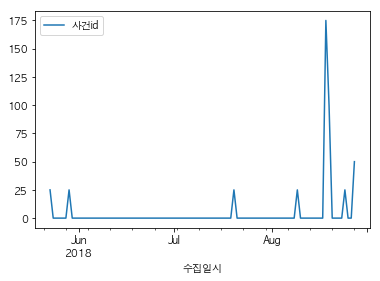

In [26]:
rs.sum().plot()


============================================================단일창_단일다중_선그래프


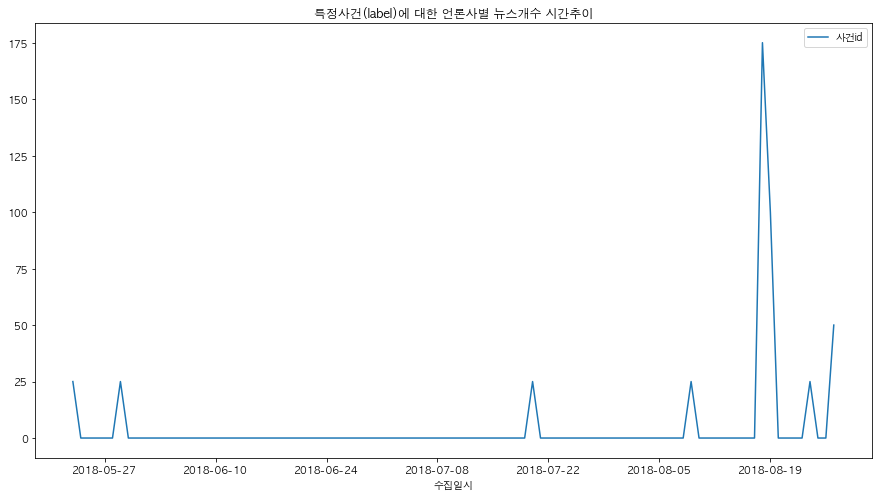

In [36]:
mpl.Line.단일창_단일다중_선그래프(df=rs.sum(), title=title명)

In [27]:
#g = df.groupby('언론사명').count()
#g

In [28]:
# 언론사를 컬럼으로, 수집일시를 인덱스로, 뉴스개수를 값으로.
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html

In [29]:
import pandas as pd
pvt = pd.pivot_table(data=df, values='_id', index='수집일시', columns='언론사명', aggfunc='count', fill_value=None, margins=False, dropna=True, margins_name='All')
pvt

/Users/sambong/anaconda3/lib/python3.6/site-packages/pandas/core/reshape/pivot.py:86: FutureWarning: '수집일시' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys, observed=False)


언론사명,KBS 뉴스,YTN,디지털타임스,매일경제,머니투데이,세계일보,아시아경제,아이뉴스24,연합뉴스,연합뉴스TV,오마이뉴스,이데일리,중앙일보,한국일보
수집일시,,,,,,,,,,,,,,
2018-05-23 17:12:21.943,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-29 08:02:25.041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-20 13:23:55.482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2018-08-09 13:39:19.472,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-18 16:03:01.957,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-18 16:04:21.858,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-18 16:09:18.461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2018-08-18 16:14:02.494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2018-08-18 16:19:12.591,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
pvt = pvt.fillna(0)
pvt

언론사명,KBS 뉴스,YTN,디지털타임스,매일경제,머니투데이,세계일보,아시아경제,아이뉴스24,연합뉴스,연합뉴스TV,오마이뉴스,이데일리,중앙일보,한국일보
수집일시,,,,,,,,,,,,,,
2018-05-23 17:12:21.943,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-05-29 08:02:25.041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-07-20 13:23:55.482,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2018-08-09 13:39:19.472,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-08-18 16:03:01.957,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-08-18 16:04:21.858,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-08-18 16:09:18.461,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2018-08-18 16:14:02.494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2018-08-18 16:19:12.591,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
# 수집일시를 단축
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rolling.html
# http://pandas.pydata.org/pandas-docs/stable/computation.html#rolling-windows
# df.rolling('2s').sum()

In [32]:
r = df.rolling(window='1D', min_periods=None, center=False, win_type=None, on=None, axis=0, closed=None)
r

ValueError: index must be monotonic

In [ ]:
r.sum()

In [ ]:
mpl.Lib.FIGSIZE

In [ ]:
mpl.Line.단일Y축_단일창_다중선그래프(df=df1, title=title명, figsize=mpl.Lib.FIGSIZE)